<a href="https://colab.research.google.com/github/Deepthi2510/hyperswitch/blob/main/Ml9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 28, 28), Labels: (60000,)
Test data shape: (10000, 28, 28), Labels: (10000,)


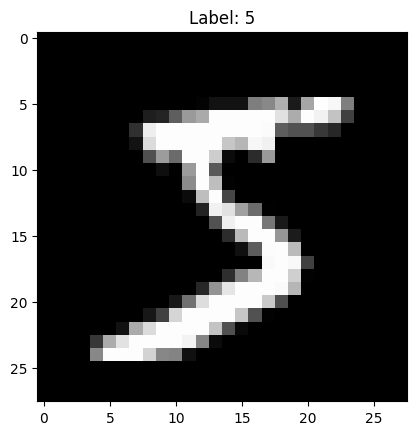

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8642 - loss: 0.4669 - val_accuracy: 0.9534 - val_loss: 0.1580
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9624 - loss: 0.1225 - val_accuracy: 0.9678 - val_loss: 0.1069
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9761 - loss: 0.0781 - val_accuracy: 0.9697 - val_loss: 0.1048
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9828 - loss: 0.0549 - val_accuracy: 0.9721 - val_loss: 0.0977
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9863 - loss: 0.0428 - val_accuracy: 0.9703 - val_loss: 0.1078
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9890 - loss: 0.0352 - val_accuracy: 0.9739 - val_loss: 0.1055
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9909 - loss: 0.0287 - val_accuracy: 0.9747 - val_loss: 0.1014
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9927 - loss: 0.0226 -

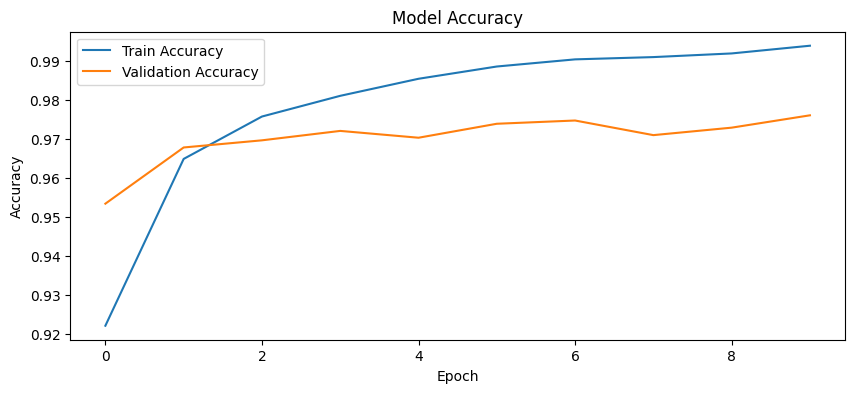

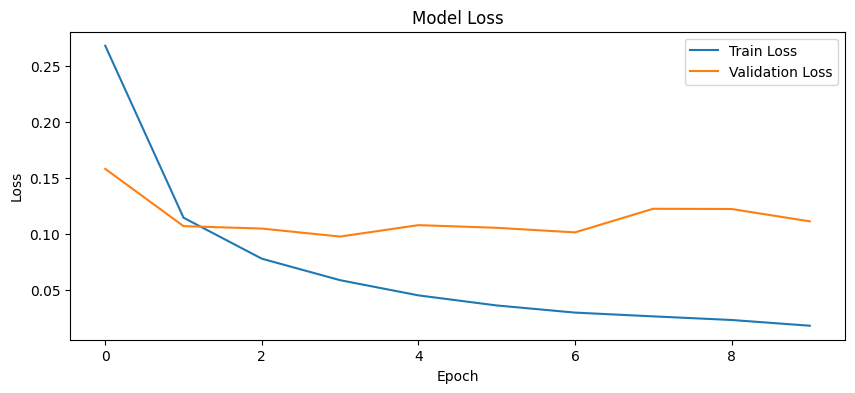

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


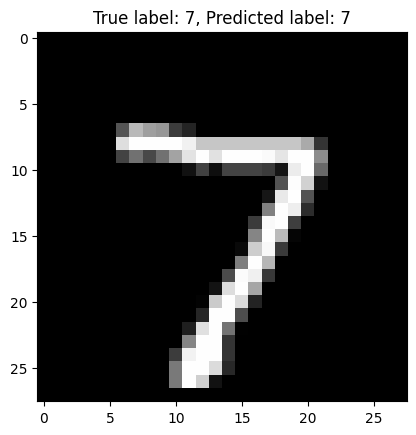

In [1]:
# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Load the MNIST Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Explore dataset
print(f'Training data shape: {X_train.shape}, Labels: {y_train.shape}')
print(f'Test data shape: {X_test.shape}, Labels: {y_test.shape}')

# Display a sample image
plt.imshow(X_train[0], cmap='gray')
plt.title(f'Label: {y_train[0]}')
plt.show()

# Step 3: Preprocess the Data
# Normalize pixel values to [0,1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten images: 28x28 -> 784
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Step 4: Build the Neural Network Model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(28*28,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the Model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

# Step 6: Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Step 7: Visualize Training History
# Accuracy plot
plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 8: Make Predictions on Test Data
predictions = model.predict(X_test)

# Display prediction for a sample image
sample_index = 0
sample_image = X_test[sample_index].reshape(28,28)
predicted_label = np.argmax(predictions[sample_index])
true_label = np.argmax(y_test[sample_index])

plt.imshow(sample_image, cmap='gray')
plt.title(f'True label: {true_label}, Predicted label: {predicted_label}')
plt.show()
